In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset

In [3]:
df=pd.read_csv(r'filtered_data.csv')

In [4]:
df.head()

,subject_id,label,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp
0,S2,0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987
1,S2,0,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573
2,S2,0,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039
3,S2,0,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142
4,S2,0,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130950,-1.161194


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5128356 entries, 0 to 5128355
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   subject_id   object 
 1   label        int64  
 2   chest_ACC_x  float64
 3   chest_ACC_y  float64
 4   chest_ACC_z  float64
 5   chest_ECG    float64
 6   chest_EMG    float64
 7   chest_EDA    float64
 8   chest_Temp   float64
 9   chest_Resp   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 391.3+ MB


In [6]:
df.shape

(5128356, 10)

In [7]:
df['label'].value_counts()

label
0    2839477
2     683012
1     669956
3     475371
4     460540
Name: count, dtype: int64

 0 = not defined / transient, 1 = baseline, 2 = stress, 3 = amusement,
4 = meditation

C:\Users\Bavelakpc\AppData\Local\Temp\ipykernel_11040\1898314582.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


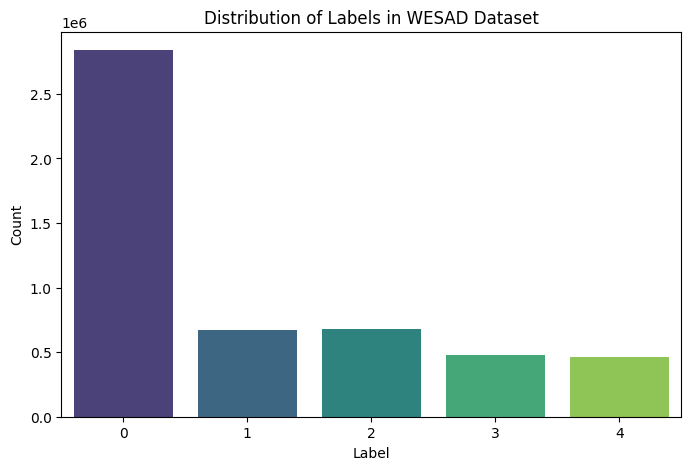

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique labels and their counts
label_counts = df['label'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in WESAD Dataset")
plt.show()


In [9]:
df_filtered = df[df['label'] != 0]
df_filtered.to_csv("wesad_filtered.csv", index=False)

In [10]:
df=pd.read_csv(r'wesad_filtered.csv')

In [11]:
df.head()

,subject_id,label,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp
0,S2,1,0.8914,-0.1102,-0.2576,0.030945,-0.003708,5.710983,29.083618,1.191711
1,S2,1,0.8926,-0.1086,-0.2544,0.033646,-0.014145,5.719376,29.122437,1.139832
2,S2,1,0.8930,-0.1094,-0.2580,0.033005,0.010208,5.706406,29.115234,1.141357
3,S2,1,0.8934,-0.1082,-0.2538,0.031815,0.012634,5.712509,29.126709,1.155090
4,S2,1,0.8930,-0.1096,-0.2570,0.030350,0.002060,5.727005,29.100860,1.133728


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288879 entries, 0 to 2288878
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   subject_id   object 
 1   label        int64  
 2   chest_ACC_x  float64
 3   chest_ACC_y  float64
 4   chest_ACC_z  float64
 5   chest_ECG    float64
 6   chest_EMG    float64
 7   chest_EDA    float64
 8   chest_Temp   float64
 9   chest_Resp   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 174.6+ MB


In [13]:
df.shape

(2288879, 10)

In [14]:
df.describe()

,label,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_ECG,chest_EMG,chest_EDA,chest_Temp,chest_Resp
count,2.288879e+06,2.288879e+06,2.288879e+06,2.288879e+06,2.288879e+06,2.288879e+06,2.288879e+06,2.288879e+06,2.288879e+06
mean,2.317402e+00,8.760179e-01,-4.634134e-02,-2.209324e-01,-4.893518e-02,-2.829238e-03,5.728748e+00,3.208638e+01,2.378430e-02
std,1.097486e+00,3.209935e-02,6.808615e-02,1.656337e-01,1.109548e-01,1.039738e-02,2.829898e+00,9.367802e-01,2.640921e+00
min,1.000000e+00,6.830000e-01,-3.102000e-01,-7.782000e-01,-3.462982e-01,-3.396606e-02,4.451752e-01,2.872351e+01,-7.077026e+00
25%,1.000000e+00,8.446000e-01,-1.224000e-01,-3.778000e-01,-1.179657e-01,-9.017944e-03,2.626419e+00,3.129578e+01,-1.701355e+00
50%,2.000000e+00,8.802000e-01,-2.780002e-02,-2.650000e-01,-2.687073e-02,-2.700806e-03,7.022476e+00,3.191586e+01,-1.617432e-01
75%,3.000000e+00,9.050000e-01,-1.600027e-03,-5.940002e-02,1.835632e-02,3.250122e-03,7.606888e+00,3.299286e+01,1.921082e+00
max,4.000000e+00,1.028600e+00,1.806000e-01,6.982000e-01,2.711334e-01,2.842712e-02,1.205711e+01,3.452197e+01,7.254028e+00


C:\Users\Bavelakpc\AppData\Local\Temp\ipykernel_11040\1898314582.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


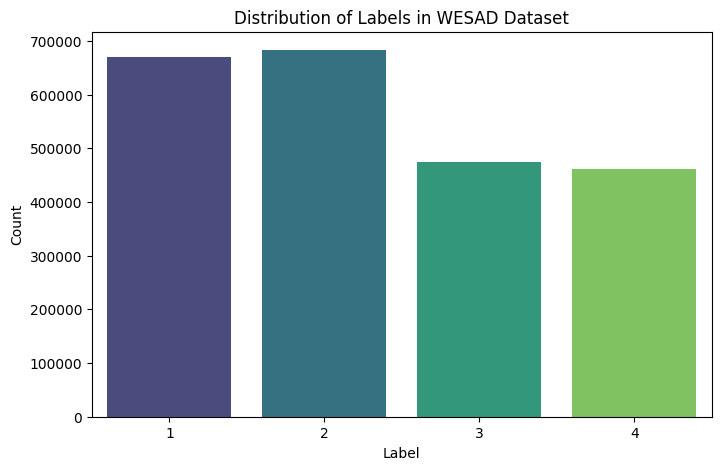

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique labels and their counts
label_counts = df['label'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in WESAD Dataset")
plt.show()


In [16]:
missing_values = df_filtered.isnull().sum()
print(missing_values)

subject_id     0
label          0
chest_ACC_x    0
chest_ACC_y    0
chest_ACC_z    0
chest_ECG      0
chest_EMG      0
chest_EDA      0
chest_Temp     0
chest_Resp     0
dtype: int64


In [17]:
# Get unique subjects and their counts
subject_counts = df['subject_id'].value_counts()
print(subject_counts)


subject_id
S3    1621415
S2     667464
Name: count, dtype: int64


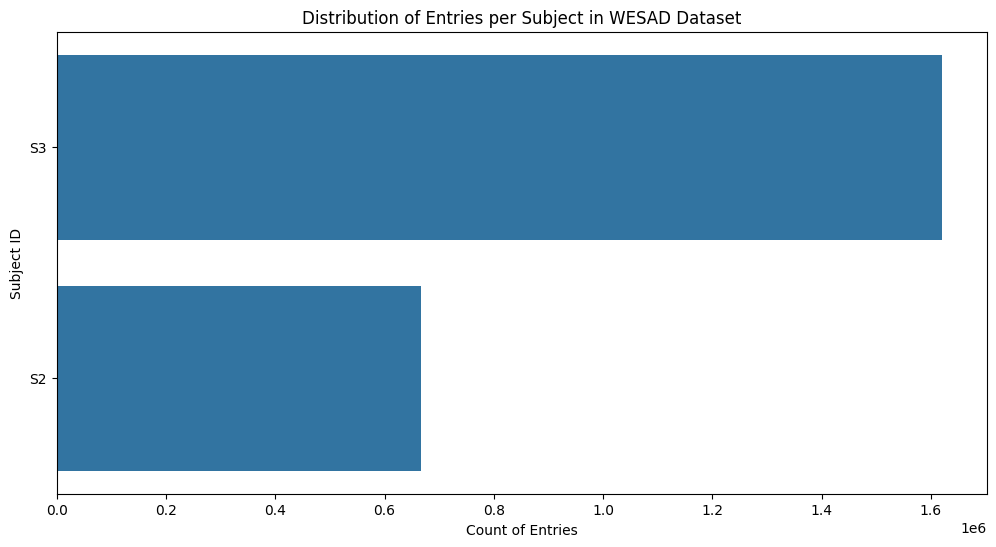

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of entries per subject
plt.figure(figsize=(12, 6))
sns.countplot(y='subject_id', data=df, order=df['subject_id'].value_counts().index)

# Add labels and title
plt.xlabel("Count of Entries")
plt.ylabel("Subject ID")
plt.title("Distribution of Entries per Subject in WESAD Dataset")
plt.show()


In [19]:
import pandas as pd

# Assuming df is your dataset
sampled_df = df.sample(frac=0.2, random_state=42)


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch

# Assuming df is your dataset
sampled_df = df.sample(frac=0.2, random_state=42)  # Simple random sampling of 20% of data

# Separate features and target
X = sampled_df[['chest_ACC_x', 'chest_ACC_y', 'chest_ACC_z', 'chest_ECG', 'chest_EMG', 'chest_EDA', 'chest_Temp', 'chest_Resp']].values
y = sampled_df['label'].values

# Encode target labels to ensure they range from 0 to num_classes - 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Transforms y into a range starting from 0
y = torch.tensor(y, dtype=torch.long)

# Convert features to a torch tensor
X = torch.tensor(X, dtype=torch.float32)


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch

# Assuming `data` is your DataFrame
# Separate features and labels
features = df.drop('label', axis=1)
labels = df['label']

# Step 1: Encode categorical features if any (e.g., 'subject_id')
# If 'subject_id' is categorical, use label encoding or one-hot encoding
features = pd.get_dummies(features, columns=['subject_id'], drop_first=True)

# Step 2: Scale numeric features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Convert to PyTorch tensors
features_tensor = torch.tensor(features_scaled, dtype=torch.float32)
labels_tensor = torch.tensor(labels.values, dtype=torch.long)

# Now the data is ready for model training


In [39]:
print(np.unique(y_train))  # Check unique labels in training set
print(np.unique(y_test))   # Check unique labels in test set


[1 2 3 4]
[1 2 3 4]


In [56]:
# Convert the tensor to a numpy array to view the first few rows
features_numpy = features.numpy()
print(features_numpy[:5])  # Print the first 5 rows


[[ 0.7825821   0.86081606  0.7207371  -0.88241094  0.437199    0.5711405
   1.1079799   1.0547847   0.8164966 ]
 [-0.48064402  0.7727286  -1.1735231  -0.14924759 -0.49486136  1.156896
  -0.18847327 -0.64288664  0.8164966 ]
 [ 1.1518117   0.75960547  1.5959843   1.7796328  -0.4541594   0.5751253
   1.0847067  -1.0956999   0.8164966 ]
 [ 1.0286621   0.91781396  1.5159013   0.4067526  -1.7137095   0.5816449
   1.1079799   0.21832095  0.8164966 ]
 [ 0.1017516  -0.768801   -0.5126525   0.02533561  2.2705925  -0.9145332
  -1.1580824   1.2334234  -1.2247449 ]]


In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Separate features and labels
features = df.drop('label', axis=1)
labels = df['label']

# Step 1: Encode categorical features if any (e.g., 'subject_id')
# If 'subject_id' is categorical, use label encoding or one-hot encoding
features = pd.get_dummies(features, columns=['subject_id'], drop_first=True)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying SMOTE for class balancing
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features_scaled, labels)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_resampled, labels_resampled, test_size=0.2, stratify=labels_resampled, random_state=42
)

# Get the number of features in the data
input_size = X_train.shape[1]  # Number of features (columns) in the data

# Reshape data for LSTM (add a sequence dimension)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Shape: [batch_size, seq_len=1, features]
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # Shape: [batch_size, seq_len=1, features]
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Creating DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)  # num_classes should be 5
    
    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        out = self.fc(hn[-1])
        return out

# Parameters
hidden_size = 64
num_classes = 5  # Number of classes in labels
num_epochs = 10
learning_rate = 0.001

# Model, loss, and optimizer
model = LSTMModel(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, labels in train_loader:
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print test accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/10], Loss: 0.0134
Epoch [2/10], Loss: 0.0007
Epoch [3/10], Loss: 0.0005
Epoch [4/10], Loss: 0.0004
Epoch [5/10], Loss: 0.0003
Epoch [6/10], Loss: 0.0003
Epoch [7/10], Loss: 0.0003
Epoch [8/10], Loss: 0.0002
Epoch [9/10], Loss: 0.0002
Epoch [10/10], Loss: 0.0002
Test Accuracy: 100.00%


In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Separate features and labels
features = df.drop('label', axis=1)
labels = df['label']

# Step 1: Encode categorical features if any (e.g., 'subject_id')
features = pd.get_dummies(features, columns=['subject_id'], drop_first=True)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying SMOTE for class balancing
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features_scaled, labels)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_resampled, labels_resampled, test_size=0.2, stratify=labels_resampled, random_state=42
)

# Get the number of features in the data
input_size = X_train.shape[1]  # Number of features (columns) in the data

# Reshape data for LSTM (add a sequence dimension)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Shape: [batch_size, seq_len=1, features]
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # Shape: [batch_size, seq_len=1, features]
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Creating DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class AttentionLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AttentionLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.attention_layer = nn.Linear(hidden_size, 1)  # Attention layer
        self.fc = nn.Linear(hidden_size, num_classes)  # Fully connected layer for classification
    
    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)  # lstm_out: (batch_size, seq_len, hidden_size)
        
        # Attention mechanism
        attention_weights = torch.tanh(self.attention_layer(lstm_out)).squeeze(-1)  # Shape: (batch_size, seq_len)
        attention_weights = torch.softmax(attention_weights, dim=1)  # Softmax across the sequence length
        attention_out = torch.bmm(attention_weights.unsqueeze(1), lstm_out).squeeze(1)  # Weighted sum of LSTM outputs

        # Final output layer
        out = self.fc(attention_out)
        return out

# Parameters
hidden_size = 64
num_classes = 5  # Number of classes in labels
num_epochs = 10
learning_rate = 0.001

# Model, loss, and optimizer
model = AttentionLSTMModel(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, labels in train_loader:
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print test accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/10], Loss: 0.0131
Epoch [2/10], Loss: 0.0008
Epoch [3/10], Loss: 0.0004
Epoch [4/10], Loss: 0.0004
Epoch [5/10], Loss: 0.0003
Epoch [6/10], Loss: 0.0003
Epoch [7/10], Loss: 0.0003
Epoch [8/10], Loss: 0.0002
Epoch [9/10], Loss: 0.0002
Epoch [10/10], Loss: 0.0002
Test Accuracy: 100.00%


In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Separate features and labels
features = df.drop('label', axis=1)
labels = df['label']

# Step 1: Encode categorical features if any (e.g., 'subject_id')
# If 'subject_id' is categorical, use label encoding or one-hot encoding
features = pd.get_dummies(features, columns=['subject_id'], drop_first=True)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying SMOTE for class balancing
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features_scaled, labels)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_resampled, labels_resampled, test_size=0.2, stratify=labels_resampled, random_state=42
)

# Get the number of features in the data
input_size = X_train.shape[1]  # Number of features (columns) in the data

# Reshape data for LSTM (add a sequence dimension)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Shape: [batch_size, seq_len=1, features]
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)  # Shape: [batch_size, seq_len=1, features]
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Creating DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Attention Layer
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size, 1)
    
    def forward(self, lstm_out):
        # Calculate attention scores
        attn_weights = torch.softmax(self.attn(lstm_out), dim=1)
        # Apply attention weights to the LSTM outputs
        attn_output = torch.sum(attn_weights * lstm_out, dim=1)
        return attn_output

# Attention-based Model
class AttentionModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AttentionModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.attn = Attention(hidden_size)  # Attention layer
        self.fc = nn.Linear(hidden_size, num_classes)  # num_classes should be 5
    
    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        # Use attention on the LSTM output
        attn_out = self.attn(lstm_out)
        # Pass through the fully connected layer
        out = self.fc(attn_out)
        return out

# Parameters
hidden_size = 64
num_classes = 5  # Number of classes in labels
num_epochs = 10
learning_rate = 0.001

# Model, loss, and optimizer
model = AttentionModel(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, labels in train_loader:
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print test accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch [1/10], Loss: 0.0136
Epoch [2/10], Loss: 0.0008
Epoch [3/10], Loss: 0.0005
Epoch [4/10], Loss: 0.0004
Epoch [5/10], Loss: 0.0003
Epoch [6/10], Loss: 0.0003
Epoch [7/10], Loss: 0.0003
Epoch [8/10], Loss: 0.0002
Epoch [9/10], Loss: 0.0002
Epoch [10/10], Loss: 0.0002
Test Accuracy: 99.99%


In [65]:
import torch.nn.functional as F

# Transformer-based Model
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads, num_layers, dropout=0.1):
        super(TransformerModel, self).__init__()
        # Define the embedding layer
        self.embedding = nn.Linear(input_size, hidden_size)
        
        # Define the transformer encoder layer
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_size, 
            nhead=num_heads, 
            dim_feedforward=hidden_size * 4, 
            dropout=dropout
        )
        
        # Stack multiple transformer layers
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Fully connected layer for classification
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Transform input using embedding layer
        x = self.embedding(x)
        
        # Permute the dimensions to match the transformer's requirement (seq_len, batch_size, hidden_size)
        x = x.permute(1, 0, 2)
        
        # Pass through transformer encoder
        transformer_out = self.transformer_encoder(x)
        
        # Take the mean across the sequence dimension to get a single representation for the input
        out = torch.mean(transformer_out, dim=0)
        
        # Pass through fully connected layer
        out = self.fc(out)
        return out

# Parameters for Transformer
hidden_size = 64
num_classes = 5  # Number of classes in labels
num_heads = 4    # Number of attention heads in transformer
num_layers = 2   # Number of transformer encoder layers
num_epochs = 10
learning_rate = 0.001

# Initialize model, loss, and optimizer
model = TransformerModel(input_size, hidden_size, num_classes, num_heads, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the transformer model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, labels in train_loader:
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Testing the transformer model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print test accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


C:\Users\Bavelakpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch [1/10], Loss: 0.0099
Epoch [2/10], Loss: 0.0038
Epoch [3/10], Loss: 0.0031
Epoch [4/10], Loss: 0.0027
Epoch [5/10], Loss: 0.0023
Epoch [6/10], Loss: 0.0022
Epoch [7/10], Loss: 0.0020
Epoch [8/10], Loss: 0.0018
Epoch [9/10], Loss: 0.0019
Epoch [10/10], Loss: 0.0018
Test Accuracy: 99.99%
